In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import KBinsDiscretizer

sns.set_theme(style="whitegrid")

In [3]:
df = pd.read_csv("../Data/Train.csv")

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (10999, 12)


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
np.random.seed(42)
df['Order_Hour'] = np.random.randint(0, 24, df.shape[0])

df[['Order_Hour']].head()

,Order_Hour
0,6
1,19
2,14
3,10
4,7


In [5]:
df['Hour_sin'] = np.sin(2 * np.pi * df['Order_Hour'] / 24)
df['Hour_cos'] = np.cos(2 * np.pi * df['Order_Hour'] / 24)

df[['Order_Hour','Hour_sin','Hour_cos']].head()

,Order_Hour,Hour_sin,Hour_cos
0,6,1.000000,6.123234e-17
1,19,-0.965926,2.588190e-01
2,14,-0.500000,-8.660254e-01
3,10,0.500000,-8.660254e-01
4,7,0.965926,-2.588190e-01


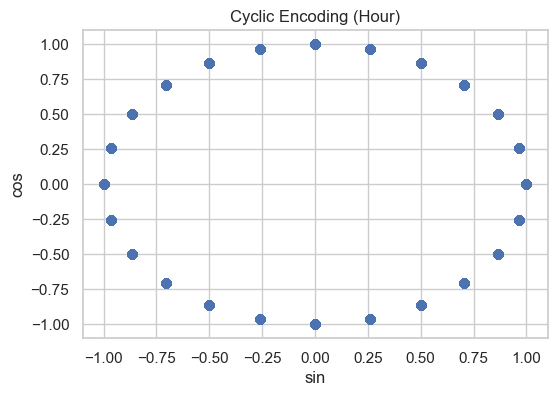

In [6]:
plt.figure(figsize=(6,4))
plt.scatter(df['Hour_sin'], df['Hour_cos'], alpha=0.5)
plt.title("Cyclic Encoding (Hour)")
plt.xlabel("sin")
plt.ylabel("cos")
plt.show()

In [7]:
df['Cost_Bin_Width'] = pd.cut(df['Cost_of_the_Product'], bins=4)

df[['Cost_of_the_Product','Cost_Bin_Width']].head()

,Cost_of_the_Product,Cost_Bin_Width
0,177,"(149.5, 203.0]"
1,216,"(203.0, 256.5]"
2,183,"(149.5, 203.0]"
3,176,"(149.5, 203.0]"
4,184,"(149.5, 203.0]"


In [ ]:
df['Cost_Bin_Freq'] = pd.qcut(df['Cost_of_the_Product'], q=4)

df[['Cost_of_the_Product','Cost_Bin_Freq']].head()

In [8]:
kbd = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')

df['Cost_Bin_KBins'] = kbd.fit_transform(
    df[['Cost_of_the_Product']]
)

df[['Cost_of_the_Product','Cost_Bin_KBins']].head()

,Cost_of_the_Product,Cost_Bin_KBins
0,177,1.0
1,216,2.0
2,183,1.0
3,176,1.0
4,184,1.0


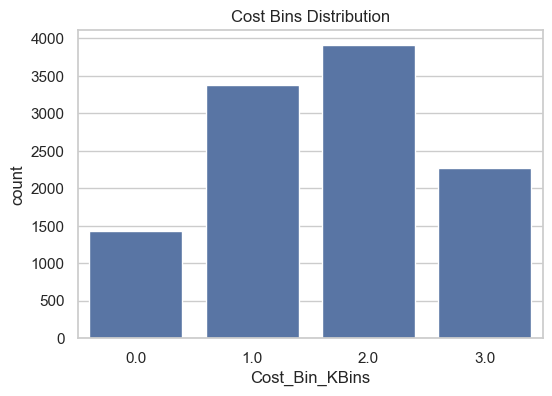

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='Cost_Bin_KBins', data=df)
plt.title("Cost Bins Distribution")
plt.show()